# ***Bike-sharing system***

**Problem Statement**
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

**Business Goal:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [1]:
#All the libraries needed for data cleaning,data visulaization and linear regression model building...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#VIF calculation imports
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the data :
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#shape of the dataset:
bikes.shape

(730, 16)

In [5]:
#to check the info and also to check for any missing values in the data set:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Converting date to Pandas datetime format
bikes['dteday'] = pd.to_datetime(bikes['dteday'],format='%d-%m-%Y')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#used datetimeindex to xtract the year and month as a derived variable:
bikes['year'] = pd.DatetimeIndex(bikes['dteday']).year
bikes['month'] = pd.DatetimeIndex(bikes['dteday']).month

In [9]:
#to check if there are any null values in the data
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
month         0
dtype: int64

In [10]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [11]:
#dropping the below two columns as we have the details and to reduce the redundancy:
bikes.drop(["dteday","mnth"],axis=1,inplace=True)
bikes.head()

,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


_______________________________________
***Similarily ,we are dropping the unwanted columns like 'yr' which we have already, removing 'holiday' columns as we get those details from the other column called 'workingday' and also removing 'casual' and 'registered' columns as those columns are data breach and if we give keep those values in the dataset, our model may overfit and may predict 100% instead of generalizing, lastly we are also dropping the instant as it won't add any strength to the model***

In [12]:
#Dropping the unwanted columns:
bikes.drop(['yr','holiday','casual','registered','instant'],axis=1,inplace=True)

In [13]:
bikes.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [14]:
#renaming the columns hum and cnt to humidity and counts for our ease of understanding.
bikes=bikes.rename(columns={'hum':'humidity','cnt':'counts'})

In [15]:
bikes.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,counts,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


## encoding 

**encoding for columns:
season,weekdays,workingday,weathersit,year and month

***All the below visualizations are drawn for our understanding of the data visually only***

In [16]:
#Year
bikes['year']=bikes['year'].map({2018:0,2019:1})

<AxesSubplot:xlabel='year', ylabel='counts'>

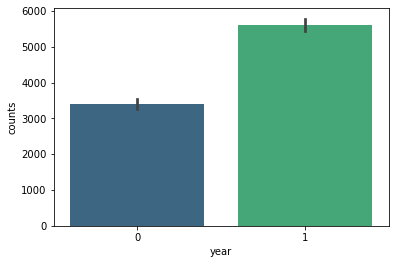

In [17]:
sns.barplot('year','counts',data=bikes,palette='viridis')

**From the above plot , we can see that number of bikes rentals are increased in the year 2019 than 2018**

**This can be due to many factors, one being the adoption time or people getting accustomed to the new option of transport**

**Second being the increase in population and people preferring not to drive and get struck in the traffic**

In [18]:
#season
seasons={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bikes['season']=bikes['season'].map(seasons)

<AxesSubplot:xlabel='season', ylabel='counts'>

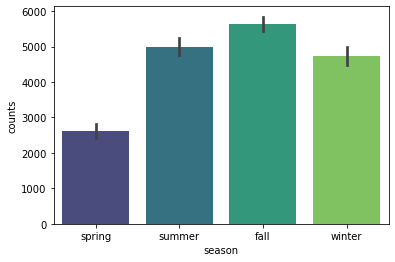

In [19]:
sns.barplot('season','counts', data=bikes, palette='viridis')

**We can see that people renting the bikes more in fall ,followed by summer, winter and spring.**

In [20]:
#weekday
weekdays={0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'}
bikes['weekday']=bikes['weekday'].map(weekdays)

<AxesSubplot:xlabel='weekday'>

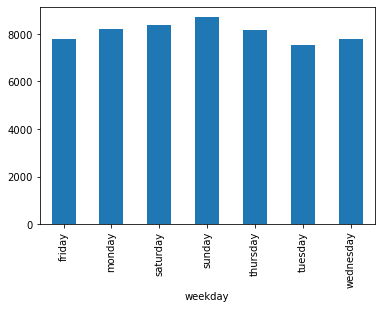

In [21]:
bikes.groupby('weekday')['counts'].max().plot(kind='bar')

**From the plot above, we can see that except sunday, all the remaining days, the average people renting bikes is close with each week , this might be because of the weekend ,more people are getting out of their houses**

In [22]:
#working day
#workingdays={0:'holiday',1:'working_day'}
#bikes['workingday']=bikes['workingday'].map(workingdays)

<AxesSubplot:xlabel='workingday', ylabel='counts'>

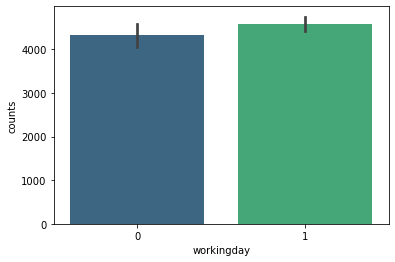

In [23]:
sns.barplot('workingday','counts',data=bikes,palette='viridis')

**We can see that more people are using bikes on workingday rather than a holiday**

In [24]:
#weathersit
weather={1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bikes["weathersit"]=bikes["weathersit"].map(weather)

<AxesSubplot:xlabel='weathersit', ylabel='counts'>

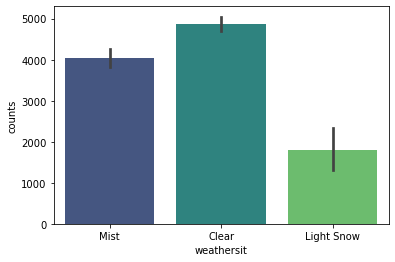

In [25]:
sns.barplot('weathersit','counts',data=bikes,palette='viridis')

**The data doesn't have any data of the heavy rain in the data set, and from the graph we have, we can see that the bikes are rented more in clear weather sit followed by mist and then light snow.**

In [26]:
months={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
bikes['month']=bikes['month'].map(months)

<AxesSubplot:xlabel='month', ylabel='counts'>

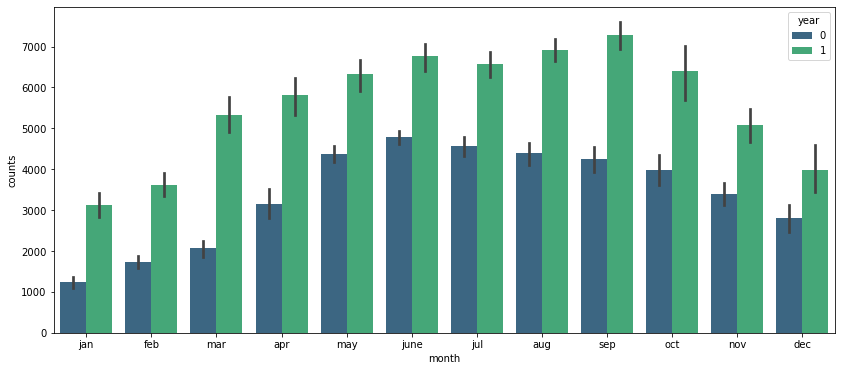

In [27]:
plt.figure(figsize=(14,6))
sns.barplot('month','counts',hue='year',data=bikes,palette='viridis')

In [28]:
bikes.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,counts,year,month
0,spring,sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0,jan
1,spring,monday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0,jan
2,spring,tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,jan
3,spring,wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,jan
4,spring,thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,jan


<AxesSubplot:xlabel='temp', ylabel='counts'>

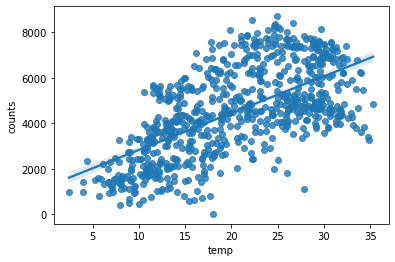

In [29]:
#temperature vs count regplot:
sns.regplot(x='temp',y='counts',data=bikes)

**We can see that if temperature increases, people taking the bikes for rent also increases**
____________

<AxesSubplot:xlabel='atemp', ylabel='counts'>

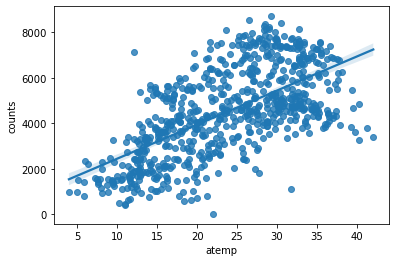

In [30]:
##regplot with atemp and counts of the bikes
sns.regplot('atemp','counts',data=bikes)

**We can see that the rentals of the bikes are increasing with the feeling of high temperatures as well**
_______

<AxesSubplot:xlabel='humidity', ylabel='counts'>

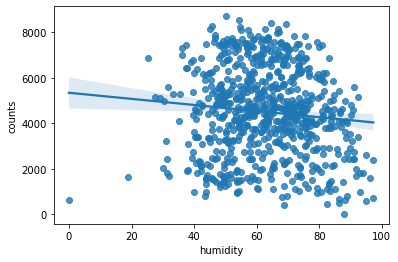

In [31]:
#regplot with humidity and counts of the bikes
sns.regplot('humidity','counts',data=bikes)

**bikes rentals are decreasing when the humidity increases**

<AxesSubplot:xlabel='windspeed', ylabel='counts'>

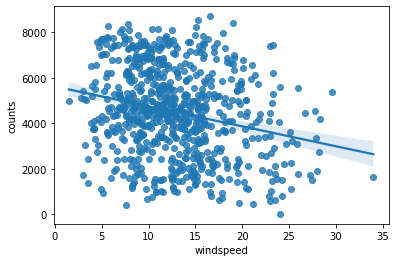

In [32]:
sns.regplot('windspeed','counts',data=bikes)

**This plot is showing an obvious nature of decrease in bikes rental with increase in the wind speed**

<AxesSubplot:xlabel='counts', ylabel='Density'>

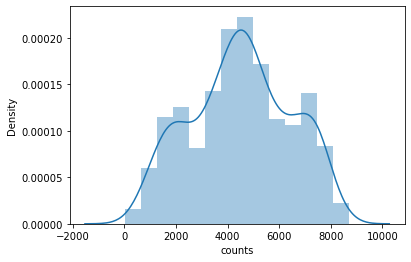

In [33]:
sns.distplot(bikes['counts'])

## Visualisation of all the variables :

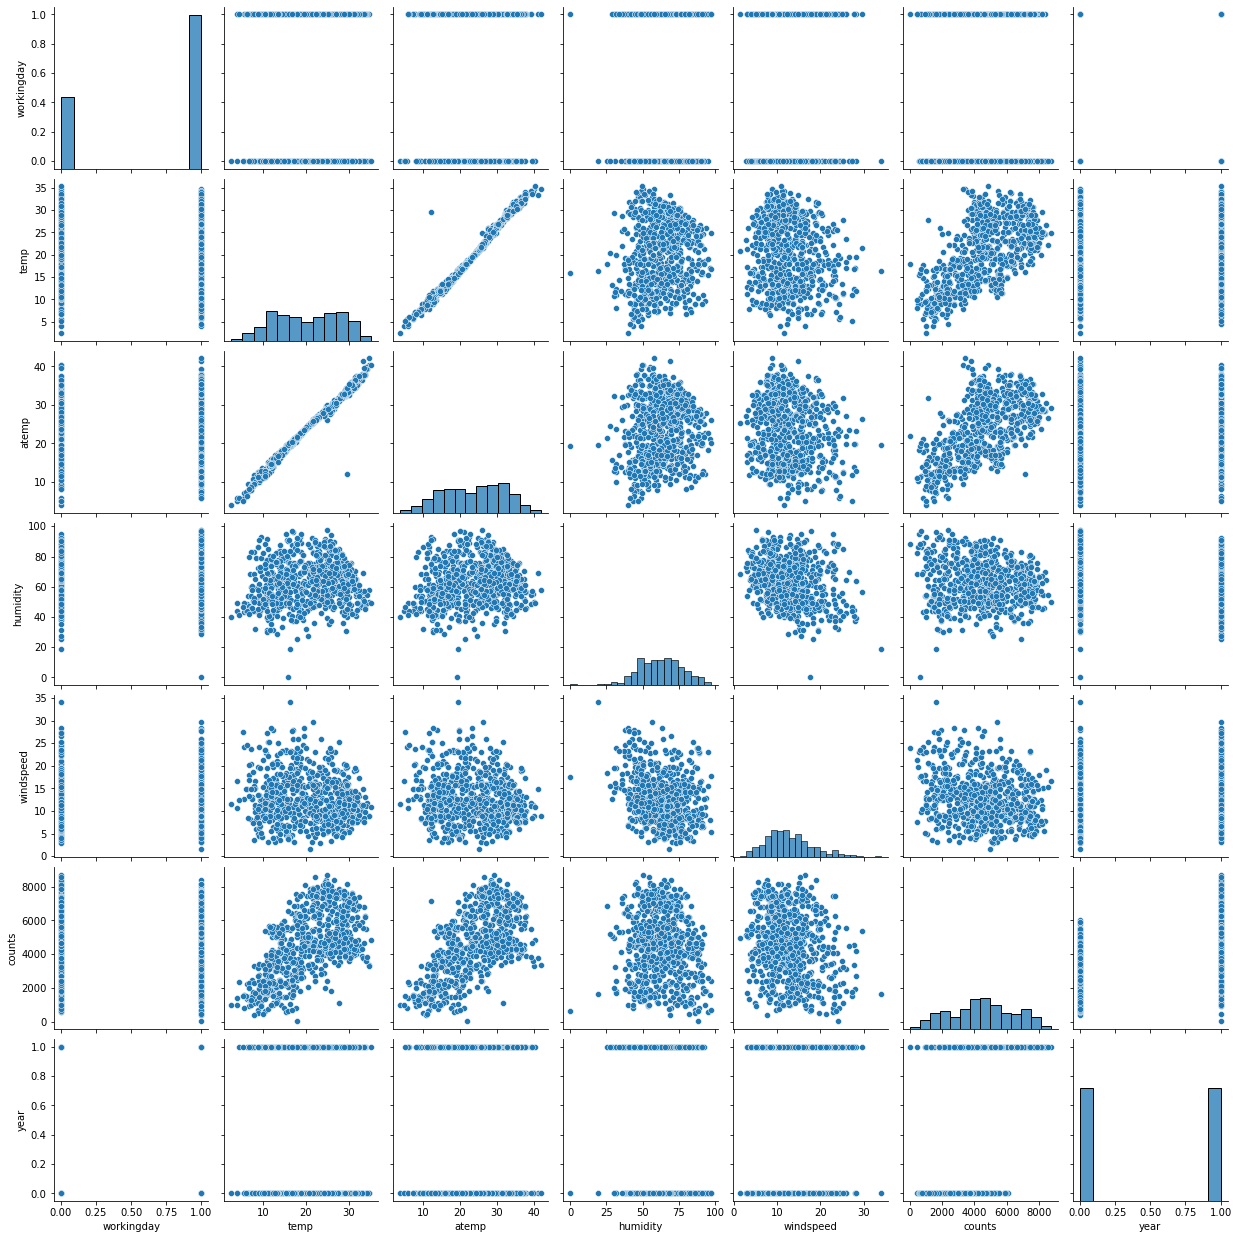

In [34]:
sns.pairplot(bikes)

<AxesSubplot:>

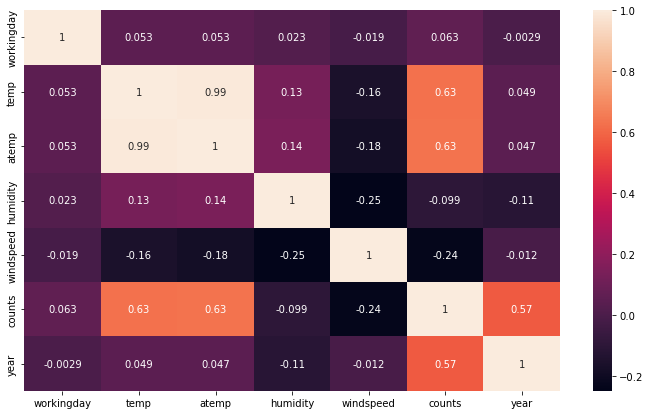

In [35]:
plt.figure(figsize=(12,7))
sns.heatmap(bikes.corr(),annot=True)

**We can see that the features temp and atemp are highly correlated, hence dropping one of it to reduce the redundancy**
___________

In [36]:
bikes.drop('atemp',axis=1,inplace=True)

In [37]:
bikes.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,counts,year,month
0,spring,sunday,0,Mist,14.110847,80.5833,10.749882,985,0,jan
1,spring,monday,0,Mist,14.902598,69.6087,16.652113,801,0,jan
2,spring,tuesday,1,Clear,8.050924,43.7273,16.636703,1349,0,jan
3,spring,wednesday,1,Clear,8.200000,59.0435,10.739832,1562,0,jan
4,spring,thursday,1,Clear,9.305237,43.6957,12.522300,1600,0,jan


In [38]:
bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

**final data set to perform the linear regression model**
____

## Categorical variables 
##### Dummy variables creation:

**Dummy variables creation is very important for categorical variables, it helps in generalizing the affect of the feature**

In [39]:
## dummmy variables creation
#seasons={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
seasons = pd.get_dummies(bikes['season'],drop_first=True)
seasons.head()
#000-fall,100-spring,010-summer,001-winter

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


_____________
***similarily for all categorical features where we need dummies:***

In [40]:
## dummmy variables creation
#workingdays = pd.get_dummies(bikes['workingday'],drop_first=True)

weather = pd.get_dummies(bikes['weathersit'],drop_first=True)

month= pd.get_dummies(bikes['month'],drop_first=True)

week_day= pd.get_dummies(bikes['weekday'],drop_first=True)

In [41]:
#after creating the dummy varaibles, addint them to the test set:
bikes=pd.concat([bikes,seasons,weather,month,week_day],axis=1)
bikes.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,counts,year,month,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,spring,sunday,0,Mist,14.110847,80.5833,10.749882,985,0,jan,...,0,0,0,0,0,0,1,0,0,0
1,spring,monday,0,Mist,14.902598,69.6087,16.652113,801,0,jan,...,0,0,0,0,1,0,0,0,0,0
2,spring,tuesday,1,Clear,8.050924,43.7273,16.636703,1349,0,jan,...,0,0,0,0,0,0,0,0,1,0
3,spring,wednesday,1,Clear,8.200000,59.0435,10.739832,1562,0,jan,...,0,0,0,0,0,0,0,0,0,1
4,spring,thursday,1,Clear,9.305237,43.6957,12.522300,1600,0,jan,...,0,0,0,0,0,0,0,1,0,0


In [42]:
bikes.columns

Index(['season', 'weekday', 'workingday', 'weathersit', 'temp', 'humidity',
       'windspeed', 'counts', 'year', 'month', 'spring', 'summer', 'winter',
       'Light Snow', 'Mist', 'aug', 'dec', 'feb', 'jan', 'jul', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'monday', 'saturday', 'sunday', 'thursday',
       'tuesday', 'wednesday'],
      dtype='object')

**Since all the categorical values are changed into dummy variables, we can now drop the original columns from which dummy variables are created**

In [43]:
bikes.drop(['season','weathersit','month','weekday'],axis=1,inplace=True)
bikes.head()

,workingday,temp,humidity,windspeed,counts,year,spring,summer,winter,Light Snow,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,14.110847,80.5833,10.749882,985,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,14.902598,69.6087,16.652113,801,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,8.050924,43.7273,16.636703,1349,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
bikes.columns

Index(['workingday', 'temp', 'humidity', 'windspeed', 'counts', 'year',
       'spring', 'summer', 'winter', 'Light Snow', 'Mist', 'aug', 'dec', 'feb',
       'jan', 'jul', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

##### Now we are done with the data preparation, we will now split the dataset into train and test data for our analysis,
###### Train data: the data we will use to train our model
###### Test data: the data we will use after creation of our model to see how out trained model is performing on the unseen data.

In [45]:
#splitting the data
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(bikes, train_size = 0.7, random_state=100)

In [46]:
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


### Rescaling the Features:
**We can see that the values of temp,humidity,windspeed ad counts are very small integer values, so, it is extremely important to rescale the variables so that they have a comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.This might become very difficult at the time of model evaluation.so , it is advised to always scale the required data.so that the units of the coefficients obtained are all on the same scale.There are two common ways of scaling:1.Minmaxscaling and 2.standardisation.**
##### We will use MinMax scaling.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'humidity','windspeed', 'counts']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,workingday,temp,humidity,windspeed,counts,year,spring,summer,winter,Light Snow,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
576,1,0.815169,0.725633,0.264686,0.827658,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,0,0.442393,0.640189,0.255342,0.465255,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0,0.245101,0.498067,0.663106,0.204096,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0.395666,0.504508,0.188475,0.482973,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
111,1,0.345824,0.751824,0.380981,0.191095,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Dividing into X and Y sets for model building:

In [49]:
#removing the counts column i.e the variable to be predicted :
y_train=df_train.pop('counts')
X_train=df_train

## Building our model using RFE :

**we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)**

### RFE
Recursive feature elimination:

Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm. RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
#we fit the model and pass it to RFE with 10 variables.
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

**Rfe has something called as support which tell's us whether a particular feature is selected or not.Ranking is set to 1 for all the ten top features and for the remaining features, it is given as 2,3,4.... depending on the priority.**

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('workingday', False, 2),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('aug', False, 11),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('jul', True, 1),
 ('june', False, 16),
 ('mar', False, 18),
 ('may', False, 10),
 ('nov', False, 7),
 ('oct', False, 15),
 ('sep', True, 1),
 ('monday', False, 3),
 ('saturday', False, 14),
 ('sunday', True, 1),
 ('thursday', False, 17),
 ('tuesday', False, 12),
 ('wednesday', False, 13)]

In [53]:
#to see only the top columns with rank 1
col = X_train.columns[rfe.support_]
col

Index(['temp', 'humidity', 'windspeed', 'year', 'spring', 'Light Snow', 'Mist',
       'jul', 'sep', 'sunday'],
      dtype='object')

In [54]:
#Columns that RFE did not select, just give a negation.
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'june',
       'mar', 'may', 'nov', 'oct', 'monday', 'saturday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model-1:

In [55]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
#adding constant variable
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [57]:
#running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.32e-184
Time:                        19:14:31   Log-Likelihood:                 489.01
No. Observations:                 510   AIC:                            -956.0
Df Residuals:                     499   BIC:                            -909.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3764      0.030     12.424      0.000       0.317       0.436
temp           0.4109      0.027     15.492      0.000       0.359       0.463
humidity      -0.1272      0.038     -3.315      0.001      -0.203      -0.052
windspeed     -0.1799      0.026     -6.798      0.000      -0.232      -0.128
year           0.2331      0.008     27.647      0.000       0.217       0.250
spring        -0.1479      0.012    -11.914      0.000      -0.172      -0.123
Light Snow    -0.2389      0.027     -8.738      0.000      -0.293      -0.185
Mist          -0.0589      0.011     -5.455      0.000      -0.080      -0.038
jul           -0.0796      0.018     -4.477      0.000      -0.114      -0.045
sep            0.0552      0.016      3.440      0.001       0.024       0.087
sunday         0.0212      0.012      1.843      0.066      -0.001       0.044
==============================================================================
Omnibus:                       59.721   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.340
Skew:                          -0.647   Prob(JB):                     4.98e-29
Kurtosis:                       5.112   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**"First model" calc, We have to remove the feature sunday as the P-value is more than 0.05 which is insiginificant, after that we will calculate the r and adj-r values again.**

### Model 2:

In [59]:
X_train_new=X_train_rfe.drop(['sunday'],axis=1)

In [60]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)

In [61]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [62]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.39e-184
Time:                        19:14:31   Log-Likelihood:                 487.28
No. Observations:                 510   AIC:                            -954.6
Df Residuals:                     500   BIC:                            -912.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3820      0.030     12.644      0.000       0.323       0.441
temp           0.4097      0.027     15.414      0.000       0.358       0.462
humidity      -0.1305      0.038     -3.396      0.001      -0.206      -0.055
windspeed     -0.1786      0.027     -6.735      0.000      -0.231      -0.126
year           0.2326      0.008     27.536      0.000       0.216       0.249
spring        -0.1481      0.012    -11.904      0.000      -0.173      -0.124
Light Snow    -0.2373      0.027     -8.663      0.000      -0.291      -0.183
Mist          -0.0582      0.011     -5.383      0.000      -0.079      -0.037
jul           -0.0791      0.018     -4.439      0.000      -0.114      -0.044
sep            0.0554      0.016      3.449      0.001       0.024       0.087
==============================================================================
Omnibus:                       53.880   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.857
Skew:                          -0.563   Prob(JB):                     2.84e-28
Kurtosis:                       5.168   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**There is no significant change in the r and adjusted-r values, so, we can understand that the column sunday is not really contributing anything to the model**

In [63]:
X_train_new.columns

Index(['const', 'temp', 'humidity', 'windspeed', 'year', 'spring',
       'Light Snow', 'Mist', 'jul', 'sep'],
      dtype='object')

In [64]:
X_train_new=X_train_new.drop(["const"],axis=1)

**Now, we chech the values of VIF to check if there are any variables with high collinearity.this is an extremely important parameter to test our linear  model. the formula for calculating VIF is, VIF=1/(1-R^2)**

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,humidity,14.87
0,temp,11.88
2,windspeed,3.95
6,Mist,2.11
3,year,2.03
4,spring,1.84
7,jul,1.40
5,Light Snow,1.20
8,sep,1.20


**We can see that the humidity variable has a very high VIF value i.e it is highly correlated, so we will remove it, but before removing it, we must first check the P-value also , by comparing both the values, we'll decide which one to drop.In our scenario, since the P-value is significant for all the features and the VIF is high for humidity, we'll remove the humidity feature from the dataset**

### Model 3:

In [66]:
X_train_new=X_train_rfe.drop(['humidity'],axis=1)

In [67]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)

In [68]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.31e-183
Time:                        19:14:32   Log-Likelihood:                 481.47
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     501   BIC:                            -906.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3021      0.019     15.795      0.000       0.264       0.340
temp           0.3953      0.027     14.909      0.000       0.343       0.447
windspeed     -0.1516      0.026     -5.930      0.000      -0.202      -0.101
year           0.2355      0.008     27.742      0.000       0.219       0.252
spring        -0.1456      0.013    -11.601      0.000      -0.170      -0.121
Light Snow    -0.2742      0.025    -10.797      0.000      -0.324      -0.224
Mist          -0.0789      0.009     -8.740      0.000      -0.097      -0.061
jul           -0.0728      0.018     -4.064      0.000      -0.108      -0.038
sep            0.0528      0.016      3.257      0.001       0.021       0.085
==============================================================================
Omnibus:                       57.146   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.269
Skew:                          -0.599   Prob(JB):                     1.15e-29
Kurtosis:                       5.199   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X_train_new=X_train_new.drop(["const"],axis=1)

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.60
1,windspeed,3.81
2,year,2.03
3,spring,1.51
5,Mist,1.49
6,jul,1.33
7,sep,1.20
4,Light Snow,1.06


**Now, the r and adj r values values are looking fine and also all the p-values are significant. The VIF values are also less than 5 which is acceptable ,hence the model is well trained now.

## residual analysis on train data:

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
y_train_price = lm.predict(X_train_rfe)

In [73]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

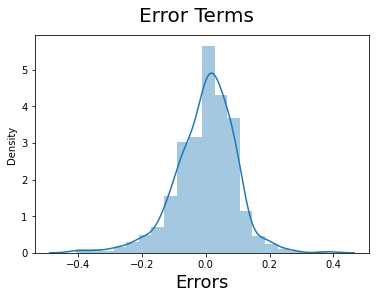

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
res=y_train - y_train_price
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**The error terms are normally distributed,hence it satisfies the assumption of the linear regression**

## making predictions on test data:


Applying the scaling on the test sets

In [75]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'humidity','windspeed', 'counts']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,workingday,temp,humidity,windspeed,counts,year,spring,summer,winter,Light Snow,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
184,0,0.837241,0.534223,0.149393,0.704300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0.911423,0.470417,0.231142,0.725421,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,1,0.496221,0.777843,0.443398,0.278853,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
221,1,0.890387,0.236659,0.449707,0.545512,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1,0.821739,0.070765,0.682387,0.569148,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Dividing into x and y test data sets

In [76]:
y_test = df_test.pop('counts')
X_test = df_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

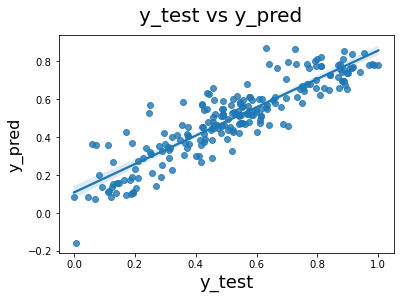

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=(y_test),y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()
    

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7873397515614862

Text(0.5, 0, 'Errors')

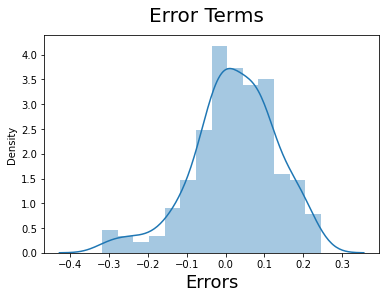

In [81]:
# Plot the histogram of the error terms of test data as a residual analysis.
fig = plt.figure()
sns.distplot((y_test - y_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7873397515614862

**Assumptions of Linear Regression:**
- There is a linear relationship between X and Y
-  Errors terms are normally distributed
- Error terms are independent of each other
- Error terms have constant variance (homoscedasticity)
The error terms are normally distributed.
The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
The predicted values have linear relationship with the actual values.

**Conclusion:**
The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:
- Temperature : 0.3953
- Light Snow : -0.2742
- year : 0.2355
- windspeed : -0.1516
- spring : -0.1456